In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style('whitegrid')
%matplotlib inline

In [23]:
data_path = '/home/caldeirao/projetos/dashboard-ecommerce/data/processed/'#caminho dos dados processados
#carregar os dados


In [24]:
os.listdir(data_path)#listar os arquivos no diretorio

['dim_products.csv', 'dim_customers.csv', 'fact_sales.csv']

In [35]:
customers = pd.read_csv(data_path + 'dim_customers.csv')
products = pd.read_csv(data_path + 'dim_products.csv')
sales = pd.read_csv(data_path + 'fact_sales.csv')

In [36]:
# Visualizar primeiras linhas
display(customers.head())
display(products.head())
display(sales.head())

,customer_id,customer_name,customer_city,customer_state
0,8,Igor Rezende,Pinto,DF
1,89,Maria Ribeiro,Barbosa da Serra,DF
2,48,Ana Clara Freitas,Peixoto,ES
3,37,Alice Souza,Barbosa,SP
4,23,Luiz Gustavo Costa,Carvalho das Flores,TO


,product_id,product_category,product_price
0,45,Roupas,376.73
1,31,Casa,1554.92
2,39,Beleza,732.42
3,47,Roupas,942.46
4,19,Esporte,217.49


,order_id,customer_id,product_id,order_date,quantity,product_price,revenue
0,1,8,45,2024-11-08,4,376.73,1506.92
1,2,89,31,2024-12-02,3,1554.92,4664.76
2,3,48,39,2025-01-01,5,732.42,3662.10
3,4,37,47,2025-06-02,4,942.46,3769.84
4,5,23,19,2025-08-30,4,217.49,869.96


## Exploração rápida 

In [37]:
# Informações gerais
print(customers.info())
print(products.info())
print(sales.info())

# Estatísticas básicas
print(customers.describe())
print(products.describe())
print(sales.describe())

# Valores nulos
print(customers.isnull().sum())
print(products.isnull().sum())
print(sales.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     99 non-null     int64 
 1   customer_name   99 non-null     object
 2   customer_city   99 non-null     object
 3   customer_state  99 non-null     object
dtypes: int64(1), object(3)
memory usage: 3.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        50 non-null     int64  
 1   product_category  50 non-null     object 
 2   product_price     50 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         ------

## Gráficos simples para demonstração

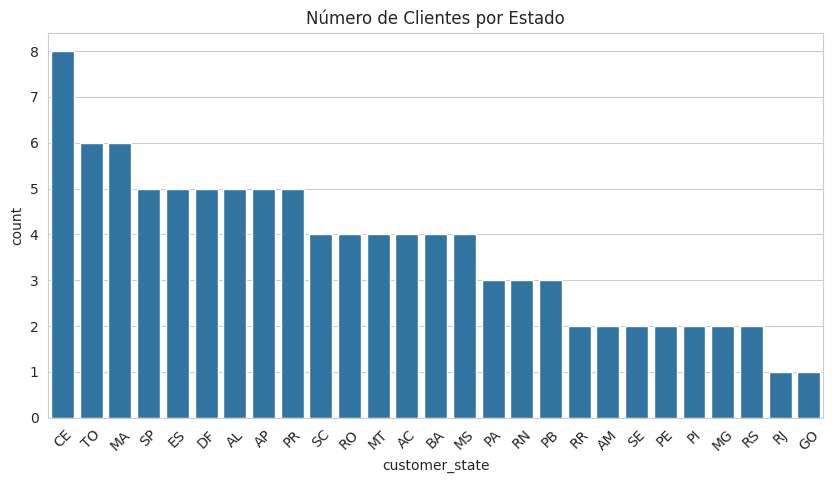

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(data=customers, x='customer_state', order=customers['customer_state'].value_counts().index)
plt.title('Número de Clientes por Estado')
plt.xticks(rotation=45)
plt.show()


## Preço médio por categoria de produto

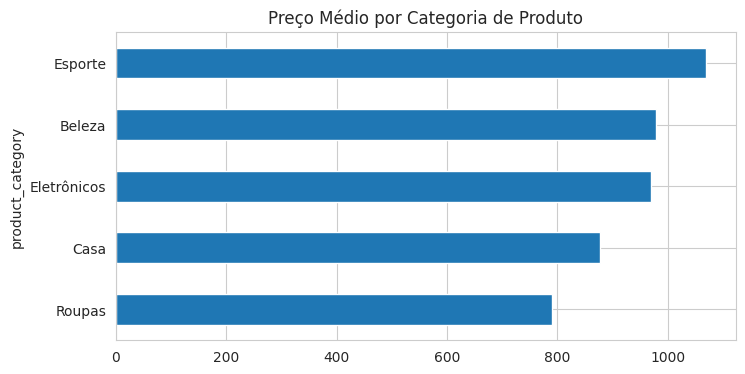

In [39]:
plt.figure(figsize=(8,4))
products.groupby('product_category')['product_price'].mean().sort_values().plot(kind='barh')
plt.title('Preço Médio por Categoria de Produto')
plt.show()



## Top 10 produtos mais vendidos